## Human Pose Estimation Using Tensorflow and OpenCV and OpenPose


<img src="https://github.com/quanhua92/human-pose-estimation-opencv/raw/master/output.JPG">

[Reference](https://github.com/quanhua92/human-pose-estimation-opencv)

**DEFINING A FULL POSE IMAGE**

- For our purpose, we'll define an image containing either Nose or Eyes and Either of the Ankles in the same image as a full shot image
- That means a Full Pose Image is an image where atleast 1 Eye or 1 Nose along with atleast 1 Ankle is detected.

In [1]:
import cv2, os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Reference: https://github.com/quanhua92/human-pose-estimation-opencv
TOP_BODY_PARTS = {"Nose": 0, "REye": 14, "LEye": 15, }
BOTTOM_BODY_PARTS = {"RAnkle": 10, "LAnkle": 13}
NETWORK = cv2.dnn.readNetFromTensorflow("MODELS\\human_pose_estimation.pb")
THRESHOLD = 0.25
REQUIRED_OUTPUTS = list(TOP_BODY_PARTS.values()) + list(BOTTOM_BODY_PARTS.values())

In [3]:
def is_fullpose(image: np.ndarray):
    '''
    Detect if an image is Full Pose or not, depending on if the image has either Eye, Nose along with one of the Ankle Key points
    
    Args:
        image: Image with 3 channels in the BGR Format.
    
    Returns:
        Bool: True if image is full pose else False
    '''
    NETWORK.setInput(cv2.dnn.blobFromImage(image, 1.0, (368, 368), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = NETWORK.forward()[:, REQUIRED_OUTPUTS, :, :]
    top, bottom = False, False
    for i in range(0,3):
        heatMap = out[0, i, :, :]
        _, confidence, _, _ = cv2.minMaxLoc(heatMap)
        if confidence > THRESHOLD:
            top = True
            break
    for i in range(3,5):
        heatMap = out[0, i, :, :]
        _, confidence, _, _ = cv2.minMaxLoc(heatMap)
        if confidence > THRESHOLD:
            bottom = True
            break
    return top and bottom

## Full Pose Image detections using Pre-Trained Model from Open Pose

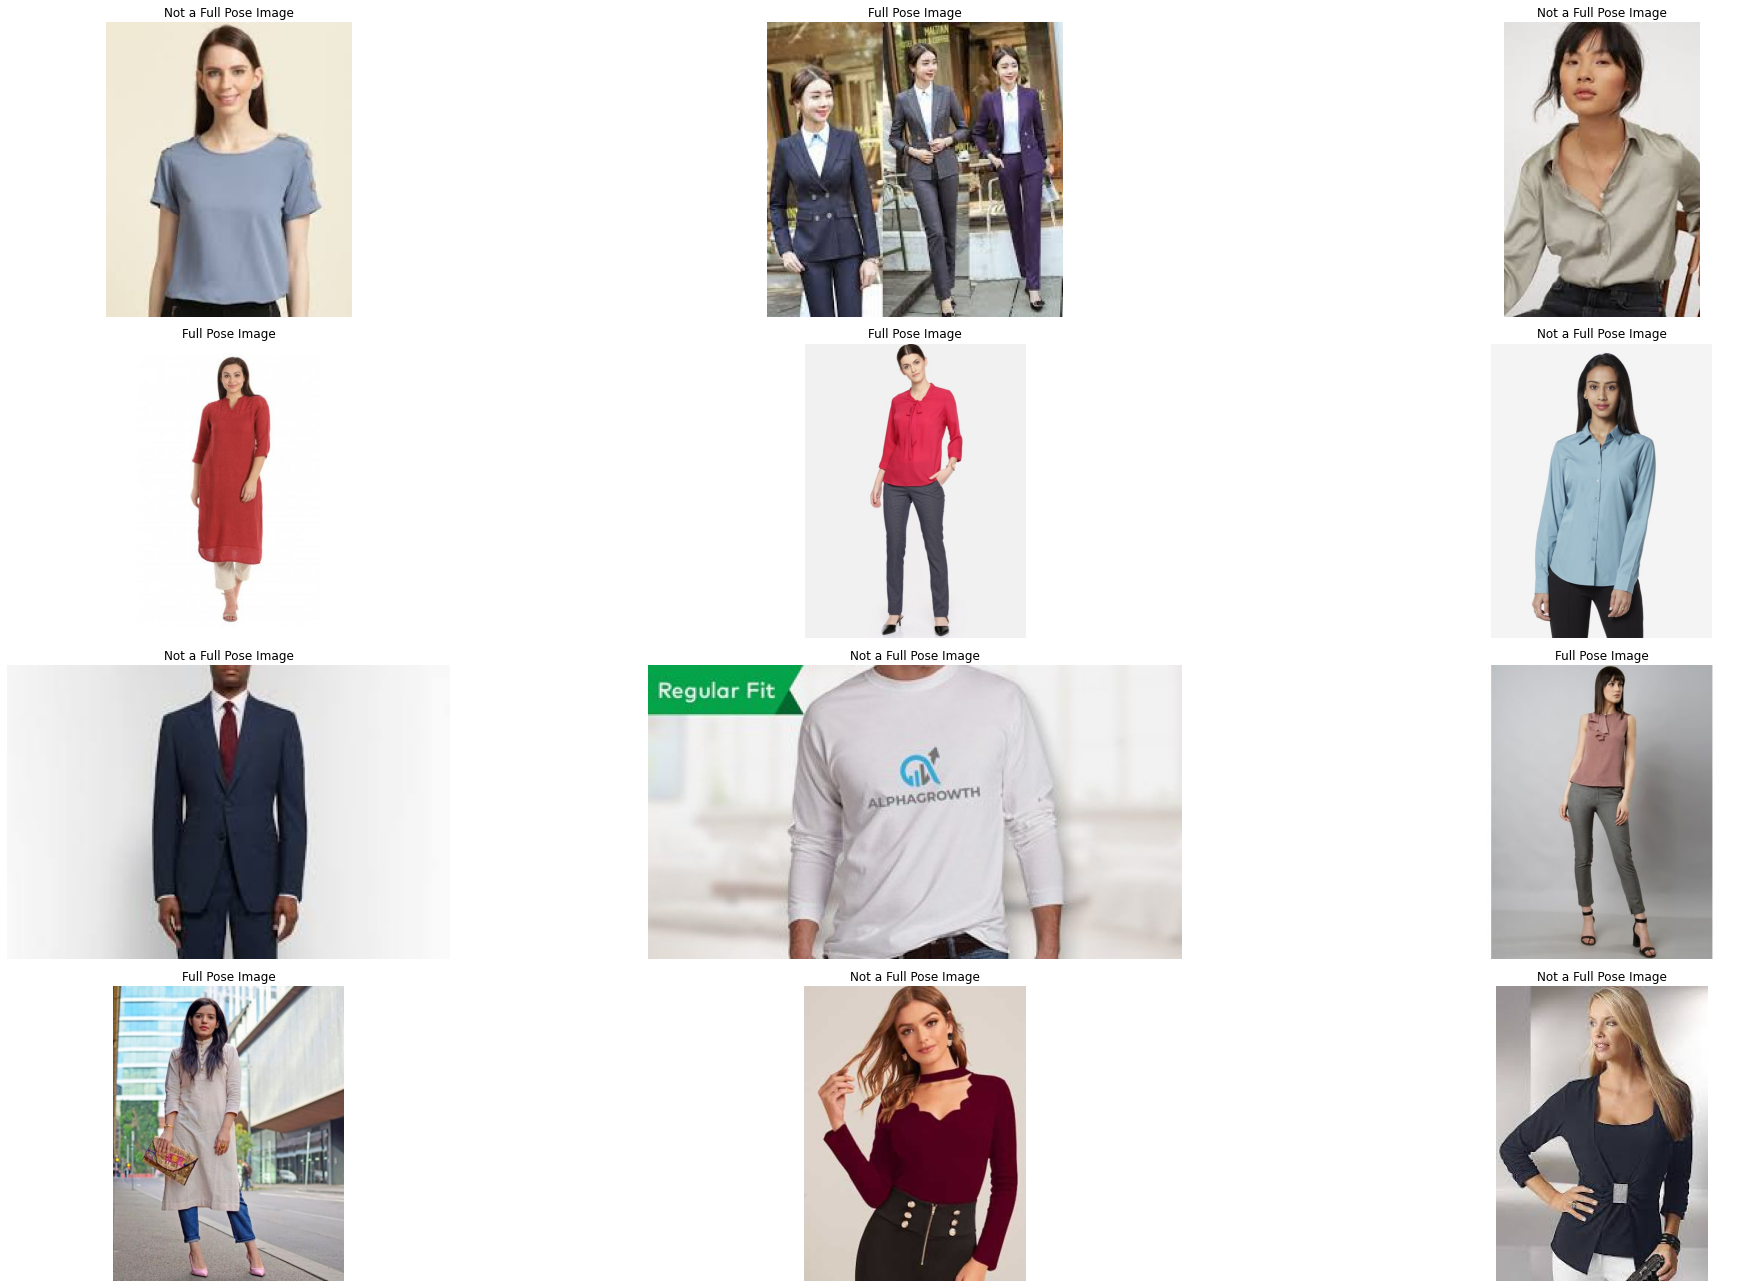

In [4]:
image_dir = ".\\google-image-search-database\\womens_formal_top_wear\\"
images = os.listdir(image_dir)[:12]
plt.figure(figsize=(32,18))
for i, img in enumerate(images, 1):
    img = cv2.imread(os.path.join(image_dir, img))
    if is_fullpose(img):
        title = "Full Pose Image"
    else:
        title = "Not a Full Pose Image"
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4,3,i)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
plt.tight_layout(w_pad=-5)

## Runtime speed test

In [5]:
%%timeit
is_fullpose(img)

159 ms ± 19.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
